In [2]:
# %pip install pydicom

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pydicom

In [4]:
DATA_PATH = "..\\data CBIS-DDSM\\"
metadata_df = pd.read_csv(DATA_PATH + "metadata-full.csv")

In [5]:
metadata_df.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.9590.100.1.2.374115997511889073021...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_CC,1.3.6.1.4.1.9590.100.1.2.859354343102033567126...,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,27.84 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\08-29-20...,2024-01-16T21:30:56.546
1,1.3.6.1.4.1.9590.100.1.2.174390361112646747718...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_MLO,1.3.6.1.4.1.9590.100.1.2.384159464510350889125...,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,28.97 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO\08-29-2...,2024-01-16T21:31:05.32
2,1.3.6.1.4.1.9590.100.1.2.419081637812053404913...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.161465562211359959230...,NaN,08-29-2017,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,14.06 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\08-29-...,2024-01-16T21:31:08.81
3,1.3.6.1.4.1.9590.100.1.2.188613955710170417803...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_MLO_1,1.3.6.1.4.1.9590.100.1.2.291121996131431385353...,NaN,08-29-2017,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,14.62 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO_1\08-29...,2024-01-16T21:31:12.246
4,1.3.6.1.4.1.9590.100.1.2.263861248711313923336...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Calc-Test_P_00038_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.177706148911820252341...,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,25.73 MB,.\CBIS-DDSM\Calc-Test_P_00038_RIGHT_CC\08-29-2...,2024-01-16T21:31:25.099


In [6]:
metadata_df = metadata_df.drop(["Data Description URI","Series UID", "Subject ID", "Study UID", "SOP Class Name",
         "SOP Class UID", "Study Date", "Download Timestamp", "Collection", "3rd Party Analysis",
         "Study Description", "Manufacturer", "Modality"],axis=1)

In [7]:
metadata_df

,Series Description,Number of Images,File Size,File Location
0,full mammogram images,1,27.84 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\08-29-20...
1,full mammogram images,1,28.97 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO\08-29-2...
2,ROI mask images,2,14.06 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\08-29-...
3,ROI mask images,2,14.62 MB,.\CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO_1\08-29...
4,full mammogram images,1,25.73 MB,.\CBIS-DDSM\Calc-Test_P_00038_RIGHT_CC\08-29-2...
...,...,...,...,...
6184,ROI mask images,2,13.25 MB,.\CBIS-DDSM\Mass-Training_P_01890_LEFT_MLO_1\0...
6185,full mammogram images,1,28.51 MB,.\CBIS-DDSM\Mass-Training_P_01908_LEFT_CC\07-2...
6186,full mammogram images,1,28.26 MB,.\CBIS-DDSM\Mass-Training_P_02033_RIGHT_MLO\07...
6187,full mammogram images,1,36.04 MB,.\CBIS-DDSM\Mass-Training_P_02079_RIGHT_MLO\07...


In [8]:
LABELS_PATH = "../data CBIS-DDSM/Labels/"
mass_train, mass_test, calc_train, calc_test = pd.read_csv(LABELS_PATH + "mass_case_description_train_set.csv"), pd.read_csv(LABELS_PATH + "mass_case_description_test_set.csv"), pd.read_csv(LABELS_PATH + "calc_case_description_train_set.csv"),pd.read_csv(LABELS_PATH + "calc_case_description_test_set.csv")


In [9]:
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [16]:
calc_test.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


#### Muhtemelen Dikkat Edilecek Sütunlar
* image view
* assessment
* File paths
* Belki "left or right breast"

In [10]:
a = mass_train[["assessment"]].value_counts(dropna=False)
a

assessment
4             533
5             299
3             279
0             129
2              77
1               1
Name: count, dtype: int64

In [11]:
metadata_df.shape

(6189, 4)

In [12]:
count = 0
for i in metadata_df["File Location"]:
    if "Calc" in i:
        count+=1
count

3383

In [13]:
def set_image_title(full_path: str) -> str :
    title : str = ""
    if "Calc" in full_path:
        title += "C"
    elif "Mass" in full_path:
        title += "M"
    if "Test" in full_path:
        title +="-Te"
    elif "Train" in full_path:
        title += "-Tr"
    patient_id_index = full_path.index("_P_")+3
    title += "-"+full_path[patient_id_index:patient_id_index+5]
    if "_CC" in full_path:
        title += "-CC"
    elif "_MLO" in full_path:
        title += "-MLO"
    if "full mammogram image" in full_path:
        title += "-Full"
    elif "ROI" in full_path:
        if "1.dcm" in full_path:
            title += "-CRP"
        elif "2.dcm" in full_path:
            title += "-ROI"
    return title

In [14]:
ds_dict = dict()
for i in range(60):#metadata_df["File Location"].shape[0]):
    full_file_location_sep : str = metadata_df["File Location"][i][2:].split("\\")
    required_loc = full_file_location_sep[0] + "\\" + full_file_location_sep[1]
    path = os.path.join(DATA_PATH, required_loc)
    for dirpath, dirname, filenames in os.walk(path):
        for f in filenames:
            try:
                ds = pydicom.dcmread(os.path.join(path,f))                
                ds_dict[set_image_title(os.path.join(path,f))] = ds
            except:
                pass


In [ ]:
ds_dict.items()

dict_items([('C-Te-00038-CC', Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.150289221513526456716485666783212849384
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.150289221513526456716485666783212849384
(0008, 0020) Study Date                          DA: '20

In [ ]:
# fig = plt.figure(figsize=(16, 20))
# columns = 4
# rows = 1
# for i in range(5, columns*rows +5):
#     fig.add_subplot(rows, columns, i-4)
#     plt.imshow(ds_array[i-1].pixel_array)
# plt.show()

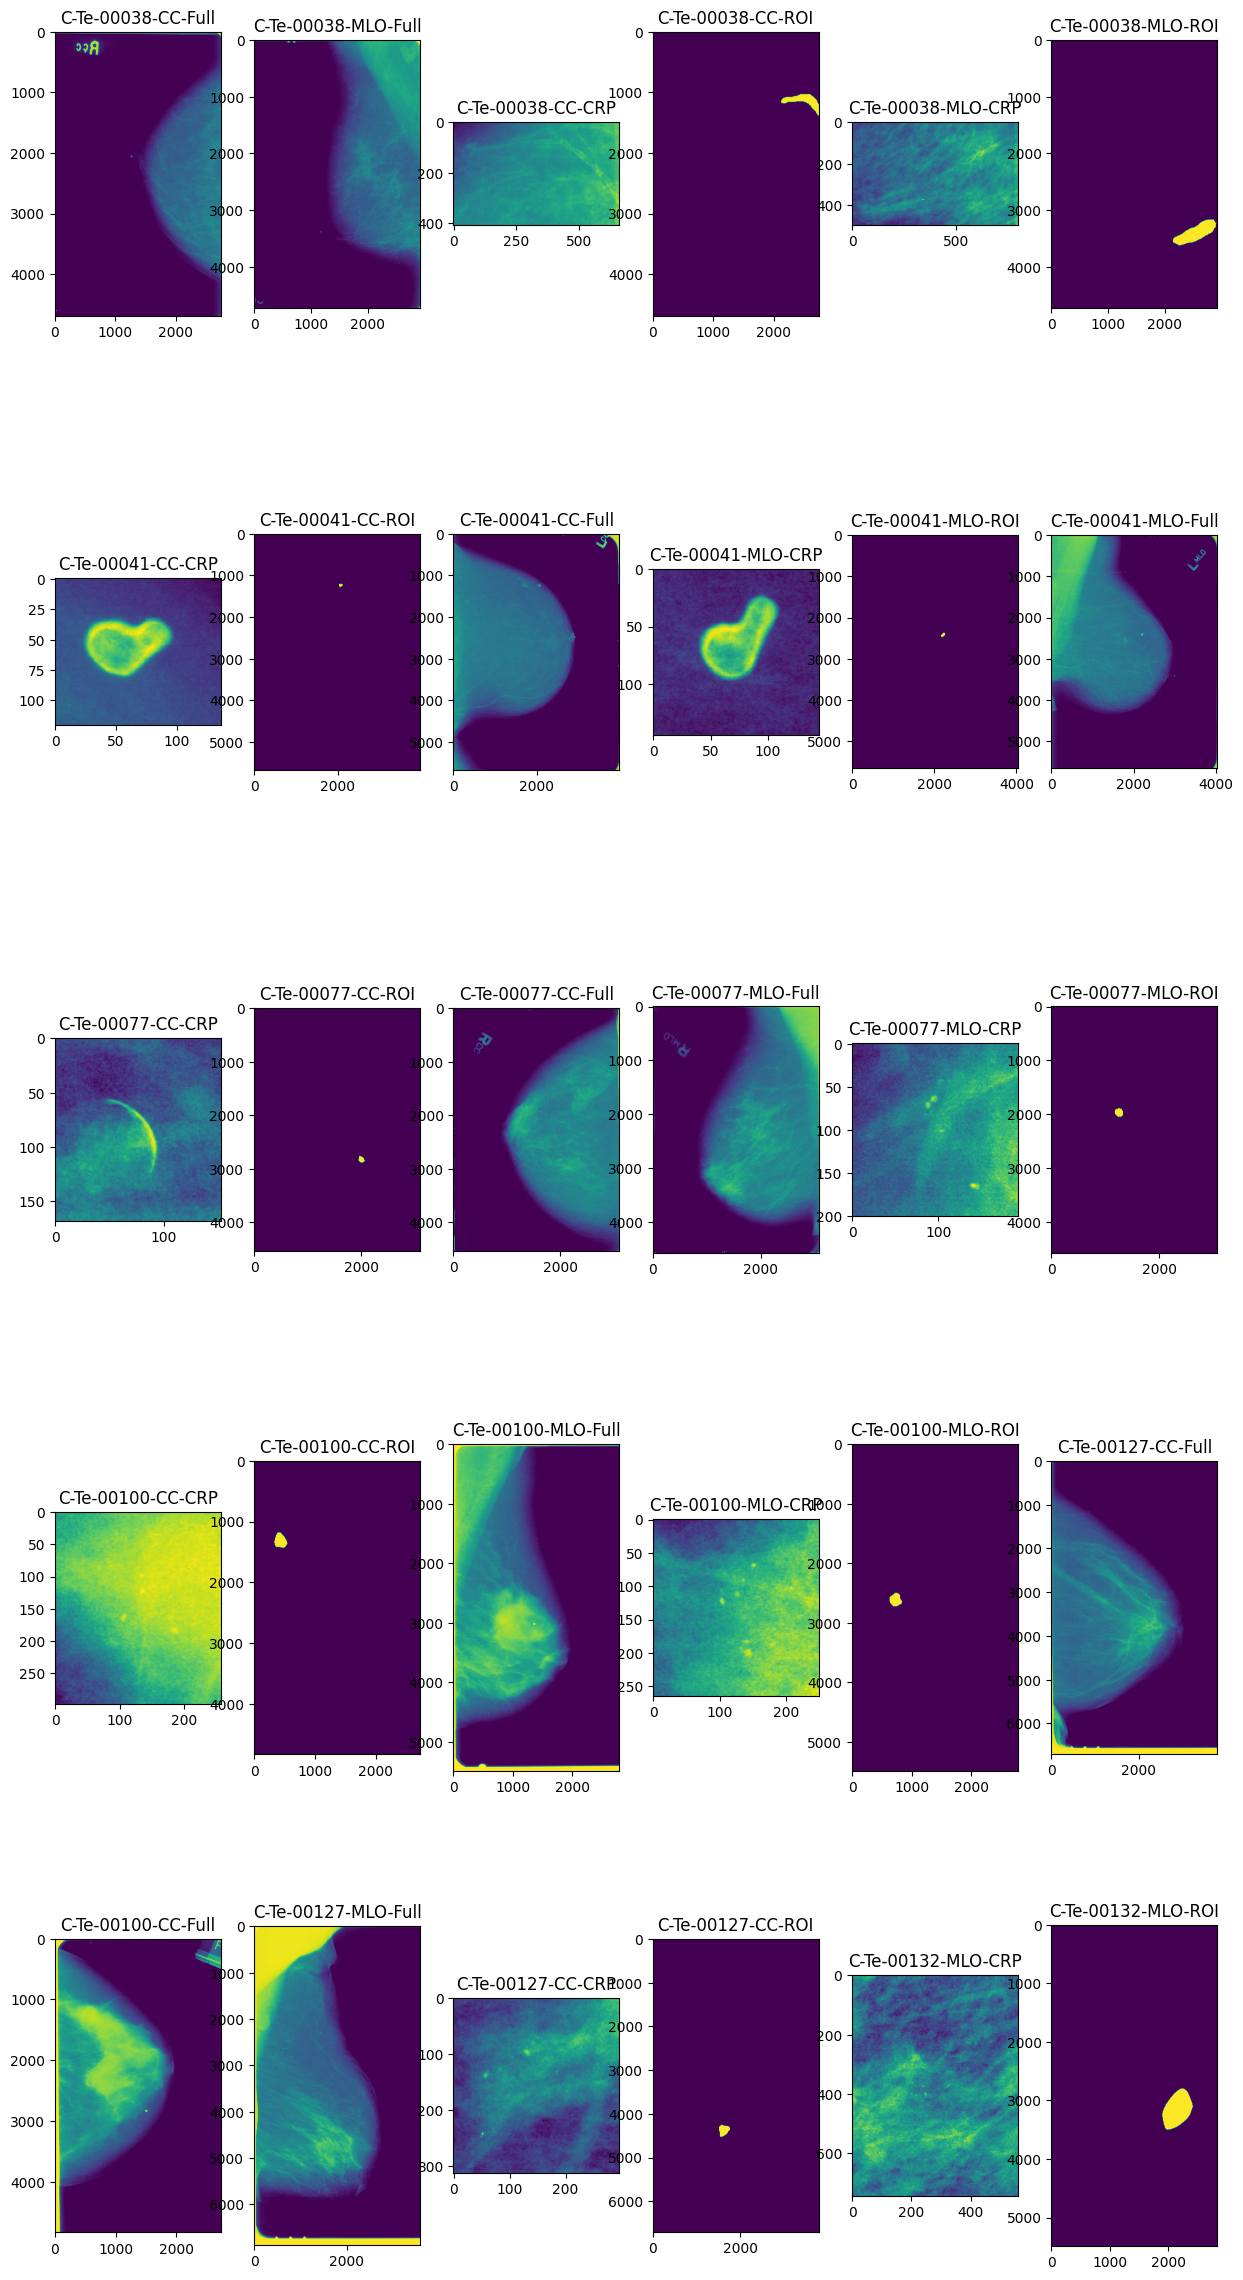

In [ ]:
fig = plt.figure(figsize=(15, 30))
columns = 6
rows = 5
keyslist = list(ds_dict.keys())
valueslist = list(ds_dict.values())
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i).set_title(keyslist[i-1])
    plt.imshow(valueslist[i-1].pixel_array, plt.cm.gray)
plt.show()

In [ ]:
valueslist[3]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.410192537111852619606277315880767520790
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.410192537111852619606277315880767520790
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date     

In [ ]:
s : str = calc_train["image file path"][0]
s = s[0:s.index("/")]
s

'Calc-Training_P_00005_RIGHT_CC'

In [ ]:
# ds_array = []
# for i in range(60):
#     path = os.path.join(DATA_PATH, mass_train["File Location"][i][2:])
#     for dirpath, dirname, filenames in os.walk(path):
#         ds = pydicom.dcmread(os.path.join(path,filenames[0]))
#         ds_array.append(ds)

KeyError: 'File Location'

In [ ]:
calc_train.shape[0] + calc_test.shape[0] + mass_test.shape[0] + mass_train.shape[0]

3568

In [ ]:
calc_train

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,Calc-Training_P_02566_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...


In [ ]:
import os
import shutil

# Function to move files into a folder
def move_files(source_dir, target_dir):
    for filename in os.listdir(source_dir):
        # Check if the file is not a directory
        if os.path.isfile(os.path.join(source_dir, filename)):
            # Move the file to the target directory
            shutil.move(os.path.join(source_dir, filename), target_dir)

# Function to group and move files
def group_and_move(raw_dir, roi_dir, cropped_roi_dir, destination_dir):
    for filename in os.listdir(raw_dir):
        # Check if the file is not a directory
        if os.path.isfile(os.path.join(raw_dir, filename)):
            # Check if corresponding files exist in other directories
            if os.path.exists(os.path.join(roi_dir, filename)) and \
               os.path.exists(os.path.join(cropped_roi_dir, filename)):
                # Create a new folder for the image
                new_folder = os.path.join(destination_dir, filename.split('.')[0])
                os.makedirs(new_folder, exist_ok=True)
                # Move the files into the new folder
                move_files(raw_dir, new_folder)
                move_files(roi_dir, new_folder)
                move_files(cropped_roi_dir, new_folder)


# Example usage
raw_images_dir = 'path/to/raw/images'
roi_dir = 'path/to/roi'
cropped_roi_dir = 'path/to/cropped/roi'
destination_dir = 'path/to/destination/folder'

group_and_move(raw_images_dir, roi_dir, cropped_roi_dir, destination_dir)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path/to/raw/images'

In [ ]:
import shutil
import os

def move_file_to_parent_folder(file_path):
    # Get the parent folder path
    parent_folder = os.path.dirname(file_path)
    
    # Get the grandparent folder path
    grandparent_folder = os.path.dirname(parent_folder)
    
    # Move the file to the grandparent folder
    shutil.move(file_path, os.path.dirname(grandparent_folder))
    return grandparent_folder

# Example usage:

for i in range(metadata_df["File Location"].shape[0]):
    path = os.path.join(DATA_PATH, metadata_df["File Location"][i+3000][2:])
    grandparent_folder = ""
    for dirpath, dirname, filenames in os.walk(path):
        for f in filenames:
            file_path = os.path.join(path,f)
            grandparent_folder = move_file_to_parent_folder(file_path)
    shutil.rmtree(grandparent_folder)


FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

In [ ]:
metadata_df.head()

NameError: name 'metadata_df' is not defined